# **Import Dependencies**

In [ ]:
import numpy as np    
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,json,nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM,Dense,Embedding,SpatialDropout1D
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
from keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import  confusion_matrix
import seaborn
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import plotly as py
import cufflinks as cf
import tensorflow
from tensorflow.keras import Sequential
from plotly.offline import iplot
py.offline.init_notebook_mode(connected=True)
cf.go_offline()
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D, Dense, LSTM, Conv1D, Embedding
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Load Dataset**

In [ ]:
df=pd.read_excel('/content/drive/MyDrive/Research Work/Pathao Implementation/Dataset/Pathao English.xlsx')

In [ ]:
df.head()

,Sentiment,Class,Sentiment.1,Class.1
0,"Nice step in that ""reserve"" is now available f...",Positive,"""রিজার্ভ"" এর দুর্দান্ত পদক্ষেপ এখন সমস্ত রাইড ...",সত্য
1,The app is good at showing the data user the d...,Positive,অ্যাপ্লিকেশনটি ডেটা ব্যবহারকারীকে ড্রাইভারের দ...,সত্য
2,Been using the app for the past 4+ years with ...,Positive,কোনও সমস্যা ছাড়াই গত 4+ বছর ধরে অ্যাপটি ব্যবহ...,সত্য
3,"After a day or two, app sent a notification fo...",Positive,"এক বা দু'দিন পরে, অ্যাপটি উবার ইটসের জন্য একটি...",সত্য
4,The app is very good for price comparison to o...,Positive,অ্যাপ্লিকেশনটি অন্যান্য সংস্থাগুলির সাথে দামের...,সত্য


In [ ]:
df=df.drop(["Sentiment.1","Class.1"],axis=1)

In [ ]:
df.columns=["Sentence","Class"]

In [ ]:
df.head()

,Sentence,Class
0,"Nice step in that ""reserve"" is now available f...",Positive
1,The app is good at showing the data user the d...,Positive
2,Been using the app for the past 4+ years with ...,Positive
3,"After a day or two, app sent a notification fo...",Positive
4,The app is very good for price comparison to o...,Positive


In [ ]:
df.shape

(1200, 2)

# **Check Null Value**

In [ ]:
df.isnull().sum()

Sentence    1
Class       1
dtype: int64

# **Delete NAN Row**

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

Sentence    0
Class       0
dtype: int64

In [ ]:
df["Class"].unique()

array(['Positive', 'Negative', 'Neutral'], dtype=object)

In [ ]:
print(
    "Total Comment:",len(df),
    "\nTotal Positive :",len(df[df.Class =='Positive']),
    "\nTotal Negative :",len(df[df.Class=='Negative']),
    "\nTotal Neutral :",len(df[df.Class =='Neutral'])
    )

Total Comment: 1199 
Total Positive : 400 
Total Negative : 400 
Total Neutral : 399


In [ ]:
df['Class'].value_counts()

Positive    400
Negative    400
Neutral     399
Name: Class, dtype: int64

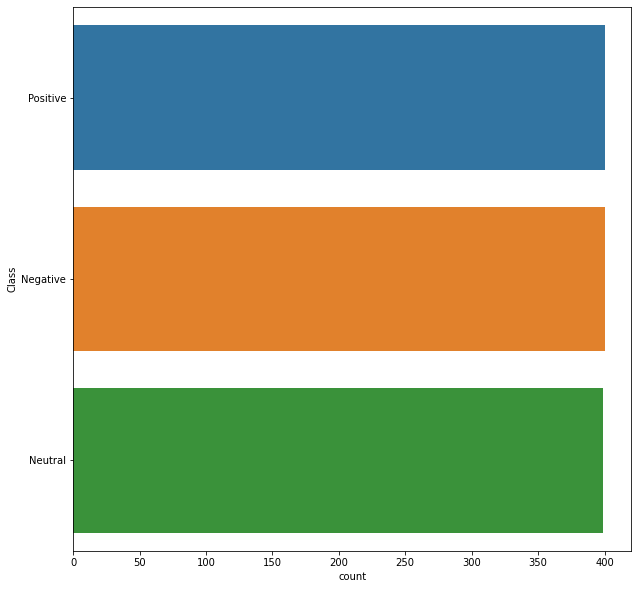

In [ ]:
plt.subplots(figsize = (10,10))
sns.countplot(y='Class', data=df)
plt.show()

# **Data Preperation and Cleaning**

# **Lower Casing**

In [ ]:
df["Lower"] = df["Sentence"].str.lower()
df.head()

,Sentence,Class,Lower
0,"Nice step in that ""reserve"" is now available f...",Positive,"nice step in that ""reserve"" is now available f..."
1,The app is good at showing the data user the d...,Positive,the app is good at showing the data user the d...
2,Been using the app for the past 4+ years with ...,Positive,been using the app for the past 4+ years with ...
3,"After a day or two, app sent a notification fo...",Positive,"after a day or two, app sent a notification fo..."
4,The app is very good for price comparison to o...,Positive,the app is very good for price comparison to o...


### **Seperate Row as Category Wise**

In [ ]:
mask = df['Class'] == "Positive"
Positive = df[mask]
mask = df['Class']  == "Negative"
Negative = df[mask]
mask = df['Class'] == "Neutral"
Neutral = df[mask]

### **Show WordCloud Based on Neutral**

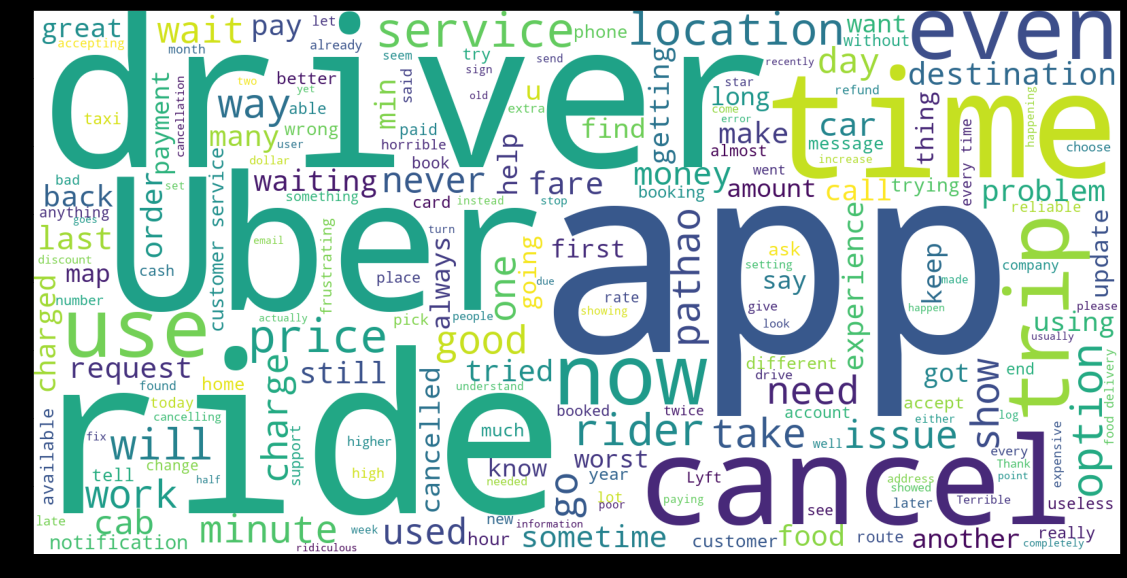

In [ ]:
wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(Neutral['Sentence'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)

In [ ]:
df.head()

,Sentence,Class,Lower
0,"Nice step in that ""reserve"" is now available f...",Positive,"nice step in that ""reserve"" is now available f..."
1,The app is good at showing the data user the d...,Positive,the app is good at showing the data user the d...
2,Been using the app for the past 4+ years with ...,Positive,been using the app for the past 4+ years with ...
3,"After a day or two, app sent a notification fo...",Positive,"after a day or two, app sent a notification fo..."
4,The app is very good for price comparison to o...,Positive,the app is very good for price comparison to o...


### **Removal of Punctuations**

In [ ]:
import string
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

df["puncuation"] = df["Lower"].apply(lambda text: remove_punctuation(text))
df.head()

,Sentence,Class,Lower,puncuation
0,"Nice step in that ""reserve"" is now available f...",Positive,"nice step in that ""reserve"" is now available f...",nice step in that reserve is now available for...
1,The app is good at showing the data user the d...,Positive,the app is good at showing the data user the d...,the app is good at showing the data user the d...
2,Been using the app for the past 4+ years with ...,Positive,been using the app for the past 4+ years with ...,been using the app for the past 4 years with n...
3,"After a day or two, app sent a notification fo...",Positive,"after a day or two, app sent a notification fo...",after a day or two app sent a notification for...
4,The app is very good for price comparison to o...,Positive,the app is very good for price comparison to o...,the app is very good for price comparison to o...


### **Removing stopwords**

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import string
from nltk.corpus import stopwords

def process_text(text):
    no_punc = [char for char in text if char not in string.punctuation]
    no_punc = ''.join(no_punc)
    
    
    return ' '.join([word for word in no_punc.split() if word.lower() not in stopwords.words('english')])

In [ ]:
df['stopwords']=df['puncuation'].apply(process_text)

## **Stemming**

In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

def stemming (text):
    return ''.join([stemmer.stem(word) for word in text])

df['stemming']=df['stopwords'].apply(stemming)
df.head()    

,Sentence,Class,Lower,puncuation,stopwords,stemming
0,"Nice step in that ""reserve"" is now available f...",Positive,"nice step in that ""reserve"" is now available f...",nice step in that reserve is now available for...,nice step reserve available ride types however...,nice step reserve available ride types however...
1,The app is good at showing the data user the d...,Positive,the app is good at showing the data user the d...,the app is good at showing the data user the d...,app good showing data user direction driver ho...,app good showing data user direction driver ho...
2,Been using the app for the past 4+ years with ...,Positive,been using the app for the past 4+ years with ...,been using the app for the past 4 years with n...,using app past 4 years issues last update wors...,using app past 4 years issues last update wors...
3,"After a day or two, app sent a notification fo...",Positive,"after a day or two, app sent a notification fo...",after a day or two app sent a notification for...,day two app sent notification hefty discount o...,day two app sent notification hefty discount o...
4,The app is very good for price comparison to o...,Positive,the app is very good for price comparison to o...,the app is very good for price comparison to o...,app good price comparison firms provide somewh...,app good price comparison firms provide somewh...


In [ ]:
df.drop(["Sentence","Lower","puncuation","stopwords"],axis=1,inplace=True)

In [ ]:
df.head()

,Class,stemming
0,Positive,nice step reserve available ride types however...
1,Positive,app good showing data user direction driver ho...
2,Positive,using app past 4 years issues last update wors...
3,Positive,day two app sent notification hefty discount o...
4,Positive,app good price comparison firms provide somewh...


# **Creating the Bag of Words model**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))

X = cv.fit_transform(df['stemming'])

In [ ]:
X.shape

(1199, 5000)

In [ ]:
y = df['Class']

## **Splitting the data into test and training data**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [ ]:
cv.get_feature_names()[150:300]

['adding',
 'addition',
 'additional',
 'address',
 'address app',
 'address cant',
 'addresses',
 'ads',
 'advance',
 'advance app',
 'advantage',
 'advise',
 'af',
 'affordable',
 'ago',
 'ago never',
 'agree',
 'ahead',
 'ahead time',
 'ahold',
 'ahold uber',
 'ahold uber phone',
 'air',
 'airport',
 'airport uber',
 'alert',
 'algorithm',
 'algorithm cant',
 'algorithm cant even',
 'allow',
 'allow add',
 'allowed',
 'allowing',
 'allows',
 'almost',
 'almost double',
 'almost every',
 'almost missed',
 'almost missed flight',
 'almost year',
 'alone',
 'along',
 'alot',
 'already',
 'already use',
 'also',
 'also app',
 'also asking',
 'also cant',
 'also dont',
 'also many',
 'also many times',
 'also pay',
 'also pay 10',
 'also ride',
 'also take',
 'also take us',
 'also wont',
 'also zero',
 'also zero customer',
 'alternate',
 'alternative',
 'alternatives',
 'although',
 'altogether',
 'always',
 'always ask',
 'always better',
 'always care',
 'always charge',
 'always cha

In [ ]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

## **MultinomialNB Algorithm**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

In [ ]:
y_pred = nb.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    Negative       0.53      0.47      0.50       142
     Neutral       0.48      0.49      0.48       142
    Positive       0.43      0.47      0.45       112

    accuracy                           0.48       396
   macro avg       0.48      0.48      0.48       396
weighted avg       0.48      0.48      0.48       396



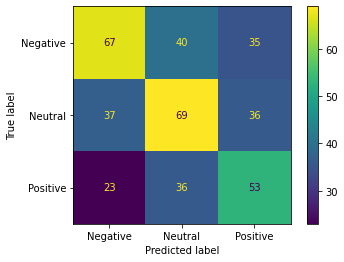

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(nb,X_test,y_test)

# **Support Vector Machine**

In [ ]:
from sklearn.svm import SVC
svm = SVC(class_weight='balanced')
svm.fit(X_train,y_train)

SVC(class_weight='balanced')

In [ ]:
y_pred = svm.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    Negative       0.50      0.59      0.54       142
     Neutral       0.54      0.43      0.48       142
    Positive       0.50      0.52      0.51       112

    accuracy                           0.51       396
   macro avg       0.51      0.51      0.51       396
weighted avg       0.52      0.51      0.51       396



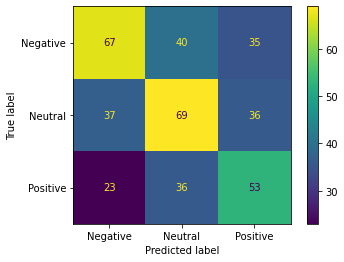

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(nb,X_test,y_test)

# **Deep Learning Part**

In [ ]:
from nltk import word_tokenize
from collections import defaultdict
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
description_list = df['Class'].tolist()

In [ ]:
def count_top_x_words(corpus, top_x, skip_top_n):
    count = defaultdict(lambda: 0)
    for c in corpus:
        for w in word_tokenize(c):
            count[w] += 1
    count_tuples = sorted([(w, c) for w, c in count.items()], key=lambda x: x[1], reverse=True)
    return [i[0] for i in count_tuples[skip_top_n: skip_top_n + top_x]]

In [ ]:
def replace_top_x_words_with_vectors(corpus, top_x):
    topx_dict = {top_x[i]: i for i in range(len(top_x))}

    return [
        [topx_dict[w] for w in word_tokenize(s) if w in topx_dict]
        for s in corpus
    ], topx_dict

In [ ]:
def filter_to_top_x(corpus, n_top, skip_n_top=0):
    top_x = count_top_x_words(corpus, n_top, skip_n_top)
    return replace_top_x_words_with_vectors(corpus, top_x)

In [ ]:
counter = Counter(df['Class'].tolist())
counter 

Counter({'Positive': 400, 'Negative': 400, 'Neutral': 399})

In [ ]:
top_10_varieties = {i[0]: idx for idx, i in enumerate(counter.most_common())}

df[df['Class'].map(lambda x: x in top_10_varieties)]

varietal_list = [top_10_varieties[i] for i in df['Class'].tolist()]

varietal_list = np.array(varietal_list)

varietal_list

array([0, 0, 0, ..., 2, 2, 2])

In [ ]:
from keras_preprocessing.sequence import pad_sequences
import keras
keras.utils.data_utils.pad_sequences 

<function keras.utils.data_utils.pad_sequences(sequences, maxlen=None, dtype='int32', padding='pre', truncating='pre', value=0.0)>

In [ ]:
from keras_preprocessing.sequence import pad_sequences

print(pad_sequences)

<function pad_sequences at 0x7f50ea4d4d30>


In [ ]:
mapped_list, word_list = filter_to_top_x(description_list, 2500, 10)
max_review_length = 150

varietal_list_cat = to_categorical(varietal_list)

mapped_list = pad_sequences(mapped_list, maxlen=150)

train_x, test_x, train_y, test_y = train_test_split(mapped_list, varietal_list_cat, test_size=0.3)

In [ ]:
train_x.shape

(839, 150)

In [ ]:
model = Sequential()
model.add(Embedding(2500, 64, input_length=150))

model.add(Conv1D(50, 5))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(max(varietal_list) + 1, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_x, train_y, epochs=3, batch_size=64)

Epoch 1/3
14/14 [==============================] - 2s 44ms/step - loss: 1.1195 - accuracy: 0.3373
Epoch 2/3
14/14 [==============================] - 1s 44ms/step - loss: 1.1040 - accuracy: 0.3421
Epoch 3/3
14/14 [==============================] - 1s 43ms/step - loss: 1.1061 - accuracy: 0.3290


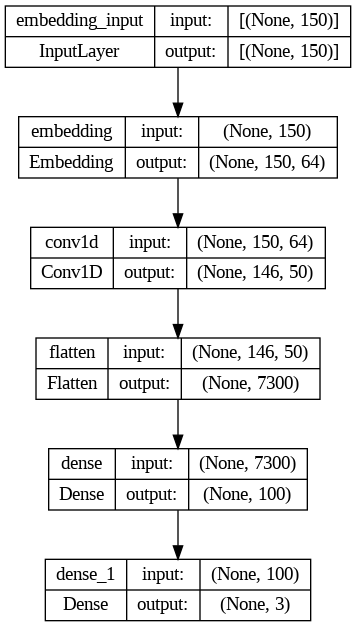

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
y_score = model.predict(test_x)

y_score = [[1 if i == max(sc) else 0 for i in sc] for sc in y_score]

n_right = 0
for i in range(len(y_score)):
    if all(y_score[i][j] == test_y[i][j] for j in range(len(y_score[i]))):
        n_right += 1

12/12 [==============================] - 0s 8ms/step


In [ ]:
print("Accuracy: %.2f%%" % ((n_right/float(len(test_y)) * 100)))

Accuracy: 34.44%
